In [1]:
import cv2
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

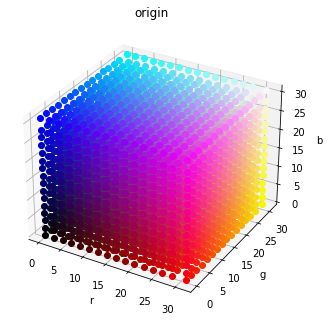

In [17]:
fig = plt.figure()
ax = Axes3D(fig)

size = 16
points = np.linspace(0, 31, size).astype(np.int32)

for z in points:
    for y in points:
        for x in points:
            ax.plot([x], [y], [z], "ro", color=(x / 32, y / 32, z / 32, 1))
ax.set_zlabel('b')
ax.set_ylabel('g')
ax.set_xlabel('r')
plt.title("origin")
plt.show()

In [3]:
img = cv2.imread("color_grading_LUT.jpg")
print(img.shape, img.dtype)

(32, 1024, 3) uint8


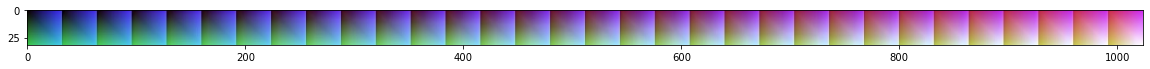

In [4]:
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.show()

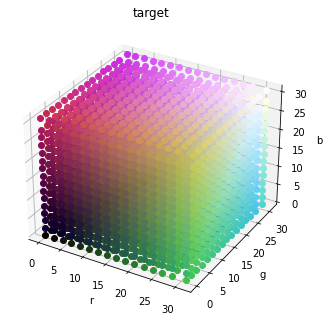

In [16]:
fig = plt.figure()
ax = Axes3D(fig)

size = 16
points = np.linspace(0, 31, size).astype(np.int32)

for z in points:
    for y in points:
        for x in points:
            x1 = x
            y1 = y + 32 * z
            current_rgb = img[x1][y1]
            ax.plot([x], [y], [z], "ro", color=(current_rgb[0] / 255, current_rgb[1] / 255, current_rgb[2] / 255, 1))
ax.set_zlabel('b')
ax.set_ylabel('g')
ax.set_xlabel('r')
plt.title("target")
plt.show()